In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb



# Continuous Target

In [121]:
df = pd.DataFrame({
    "Unit_Test_Marks" : [23, 20, 19, 17],
    "Terminal_Marks" : [43, 42, 42, 41],
    "Performance" : ["A+", "A","A", "B"],
    "Gender" : [0, 1, 0,1], # Female -> 0
    "Final_Marks" : [97, 93, 90, 86]
})

target_col = ["Final_Marks"]

In [2]:
df_non_null = df.copy()
df_non_null.fillna(0,inplace=True)

NameError: name 'df' is not defined

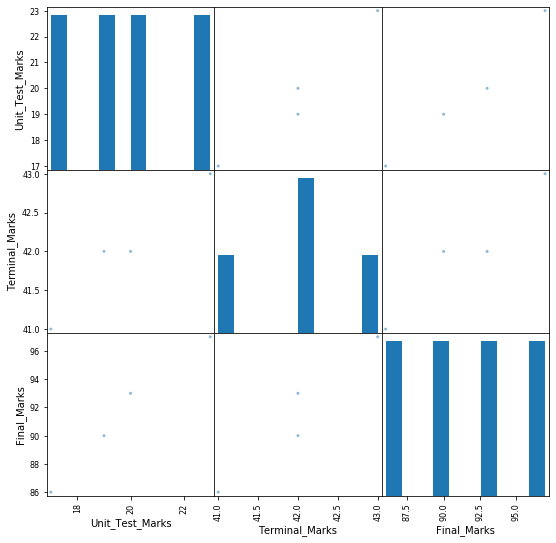

In [122]:
num_cols = ["Unit_Test_Marks","Terminal_Marks"]
pd.plotting.scatter_matrix(df_non_null[num_cols+ target_col] ,figsize=(9,9));

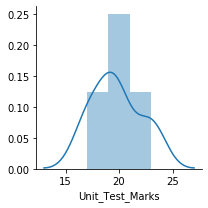

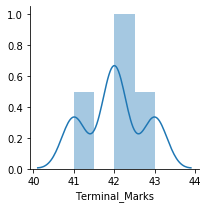

In [123]:
for col in num_cols:
    g = sb.FacetGrid(df_non_null);
    g.map(sb.distplot,col)

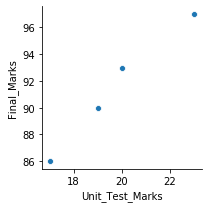

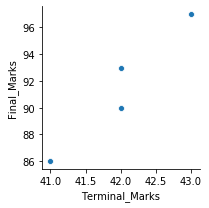

In [124]:
for col in num_cols:
    g = sb.FacetGrid(df_non_null);
    g.map(sb.scatterplot,col,target_col[0])

/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


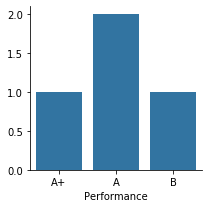

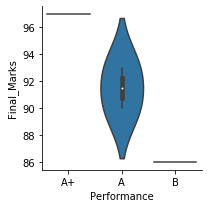

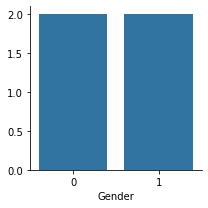

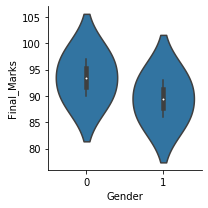

In [125]:
cat_cols = ["Performance","Gender"]
for col in cat_cols:
    g = sb.FacetGrid(df_non_null);
    g.map(sb.countplot,col);
    g1 = sb.FacetGrid(df_non_null);
    g1.map(sb.violinplot,col,target_col[0]);

In [128]:
pd.pivot_table(data=df_non_null,index=cat_cols,values=target_col[0],aggfunc=["mean","median"])

mean      median
                   Final_Marks Final_Marks
Performance Gender                        
A           0               90          90
            1               93          93
A+          0               97          97
B           1               86          86

# Discrete Target

In [152]:
df = pd.DataFrame({
   "Unit_Test_Marks" : [23, 20, 19, 17],
    "Terminal_Marks" : [43, 42, 42, 41],
    "Performance" : ["A+", "A","A", "B"],
    "Gender" : [0, 1, 1,1], # Female -> 0
    "Recommend" : [1 , 1, 1,0]
})

target_col = ["Recommend"]

In [1]:
num_cols = ["Unit_Test_Marks","Terminal_Marks"]
colors = ["#089c2d" if r == 1 else "#ed1509" for r in df_non_null[target_col[0]]]
pd.plotting.scatter_matrix(df_non_null[num_cols]  ,color=colors, figsize=(9,9));

NameError: name 'df' is not defined

/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/susmitvengurlekar/opt/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


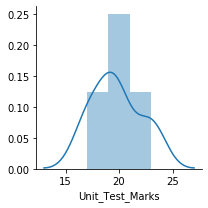

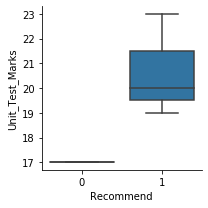

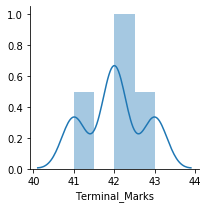

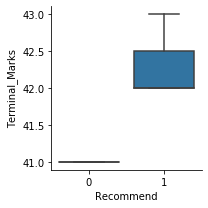

In [154]:
for col in num_cols:
    g = sb.FacetGrid(df_non_null);
    g.map(sb.distplot,col)
    g1 = sb.FacetGrid(df_non_null);
    g1.map(sb.boxplot,target_col[0],col);

In [156]:
cat_cols = ["Performance","Gender"]
pd.pivot_table(data=df_non_null,index=cat_cols,values=target_col[0],aggfunc="count")

,,Recommend
Performance,Gender,
A,1,2
A+,0,1
B,1,1
